In [104]:
import numpy as np
import matplotlib.pyplot as plt

In [123]:
faster= np.load("/ws/data/ICCV23_checkpoints/faster_s3.npy", allow_pickle=True)
detf= np.load("/ws/data/ICCV23_checkpoints/detf_f3.npy", allow_pickle=True)

In [124]:
clean_clean_confusion_matrix_cs = faster.item().get('clean_clean_confusion_matrix_cs')
matrix_sample_number = faster.item().get('clean_clean_matrix_sample_number')
clean_clean_confusion_matrix_cs = clean_clean_confusion_matrix_cs / (matrix_sample_number+1e-6)
clean_corr_confusion_matrix_cs = faster.item().get('clean_corr_confusion_matrix_cs')
clean_corr_confusion_matrix_cs = clean_corr_confusion_matrix_cs / (matrix_sample_number+1e-6)

detf_clean_clean_confusion_matrix_cs = detf.item().get('clean_clean_confusion_matrix_cs')
detf_matrix_sample_number = detf.item().get('clean_clean_matrix_sample_number')
detf_clean_clean_confusion_matrix_cs = detf_clean_clean_confusion_matrix_cs / (detf_matrix_sample_number+1e-6)
detf_clean_corr_confusion_matrix_cs = detf.item().get('clean_corr_confusion_matrix_cs')
detf_clean_corr_confusion_matrix_cs = detf_clean_corr_confusion_matrix_cs / (detf_matrix_sample_number+1e-6)


In [125]:
def plot_matrix(cm,
                dataset='cityscapes',
                classes=0,
                normalize='None',
                txt=False,
                title='Matrix',
                cmap=plt.cm.Blues,
                colorbar='off',
                xaxis='clean domain',
                yaxis='corrupted domain',
                min_value=0.0,
                max_value=0.5):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if classes != 0:
        classes = [i for i in range(classes)]
    elif dataset == 'cityscapes':
        classes = ['person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle', 'background']
    elif dataset == 'coco':
        classes = []

    plt.figure(figsize=(len(classes), len(classes)))
    if normalize == 'None':
        pass
    elif normalize == 'x':
        cm = cm.astype('float') / (cm.sum(axis=0)[:, np.newaxis] + 1e-8)
        print("x Normalized confusion matrix")
    elif normalize == 'y':
        cm = cm.astype('float') / (cm.sum(axis=1)[np.newaxis, :] + 1e-8)
        print("y Normalized confusion matrix")
    elif normalize == 'xy':
        cm = cm.astype('float') / (cm.sum())
        print("XY Normalized confusion matrix")

    else:
        # print('Confusion matrix, without normalization')
        pass

    # print(cm)
    # print(cm.diag() / cm.sum(1))
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 20

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
    if colorbar=='on':
        plt.colorbar()
    plt.xticks(list(range(len(classes))))
    plt.xticks(list(range(len(classes))))
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes, rotation=45)

    if txt:
        fmt = '.2f' if normalize else '.2f' #'d'
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                plt.text(j, i, format(cm[i, j], fmt),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    
#     plt.axis('off')
    plt.ylabel(yaxis, fontsize=30, labelpad=20)
    plt.xlabel(xaxis, fontsize=30, labelpad=20)
    plt.clim(min_value, max_value)
#     plt.rc('font', size=30)
    ax = plt.gca()
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    # wandb.log({title: plt})
    return plt

In [126]:
# color bar
# plot_matrix(detf_clean_corr_confusion_matrix_cs.T, dataset='cityscapes', title='OLA-DG', colorbar='on', normalize='x', max_value=0.2, xaxis='clean domain', yaxis='corrupted domain')

x Normalized confusion matrix


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

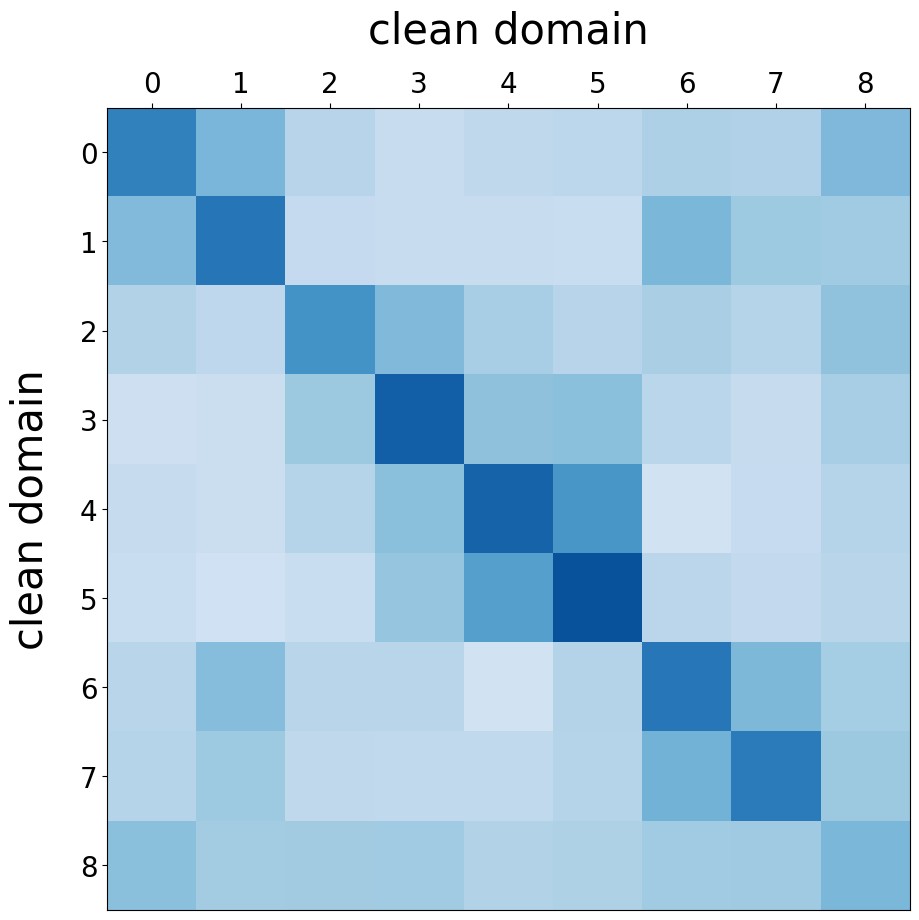

In [127]:
plot_matrix(clean_clean_confusion_matrix_cs, dataset='cityscapes', title='baseline', normalize='x', max_value=0.3, xaxis='clean domain', yaxis='clean domain')

x Normalized confusion matrix


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

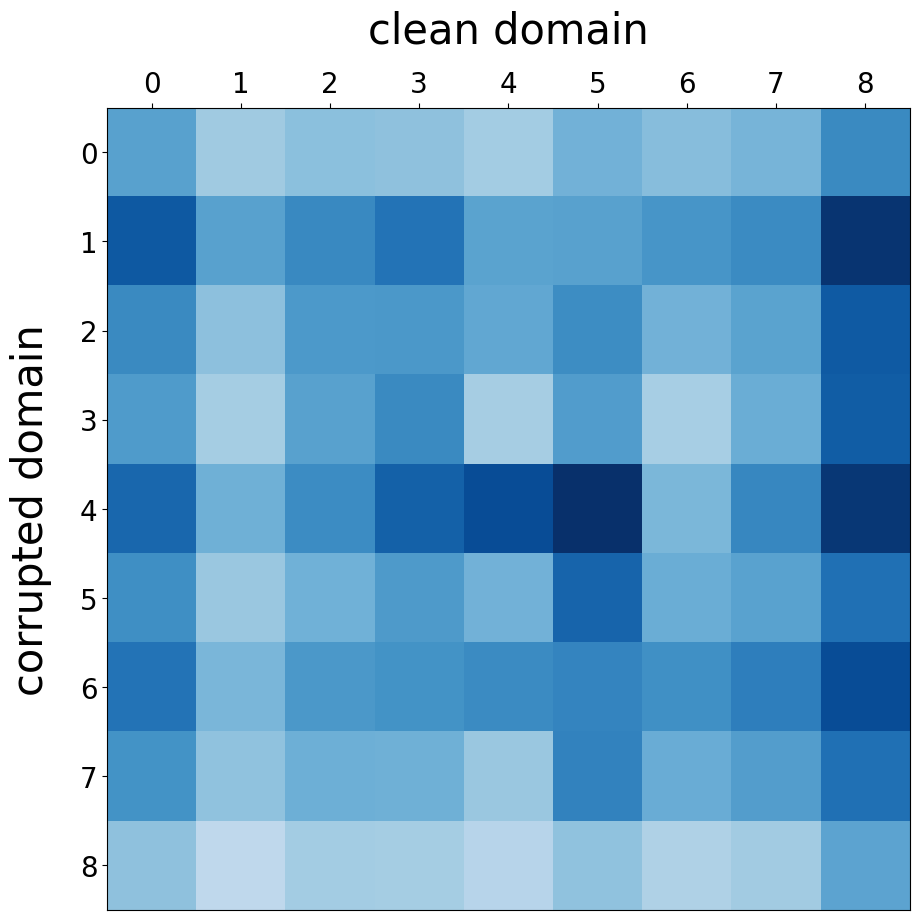

In [128]:
plot_matrix(clean_corr_confusion_matrix_cs.T, dataset='cityscapes', title='baseline', normalize='x', max_value=0.2, xaxis='clean domain', yaxis='corrupted domain')

x Normalized confusion matrix


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

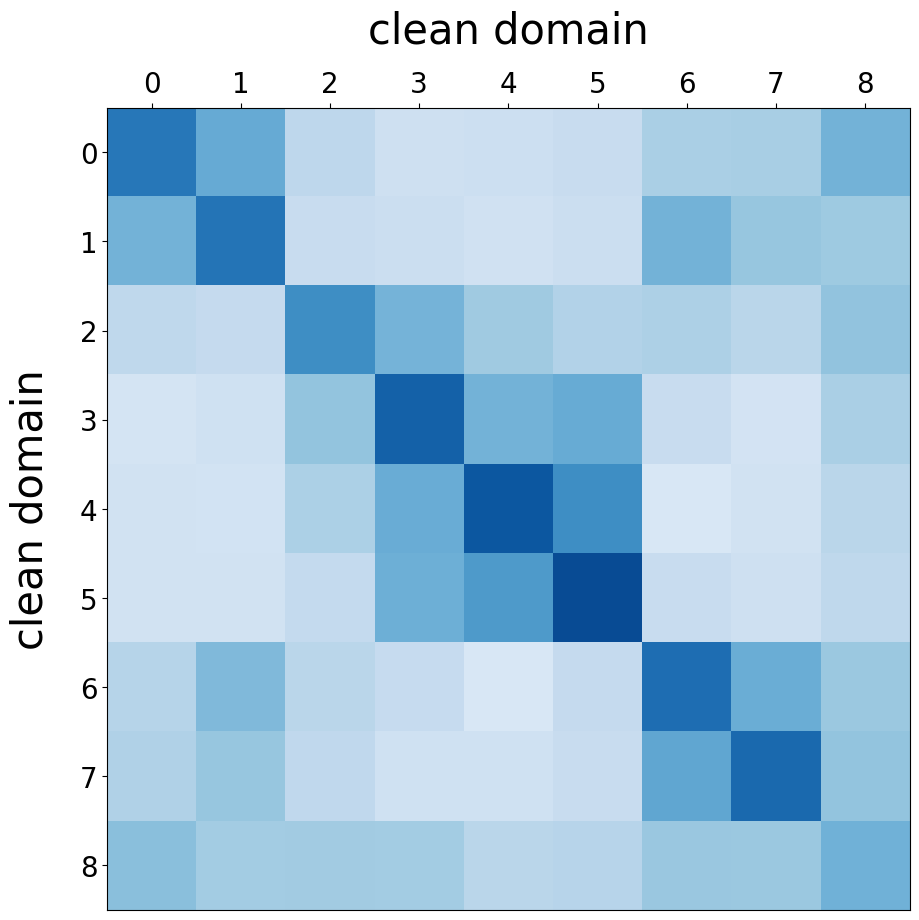

In [129]:
plot_matrix(detf_clean_clean_confusion_matrix_cs, dataset='cityscapes', title='OLA-DG', normalize='x', max_value=0.3, xaxis='clean domain', yaxis='clean domain')

y Normalized confusion matrix


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

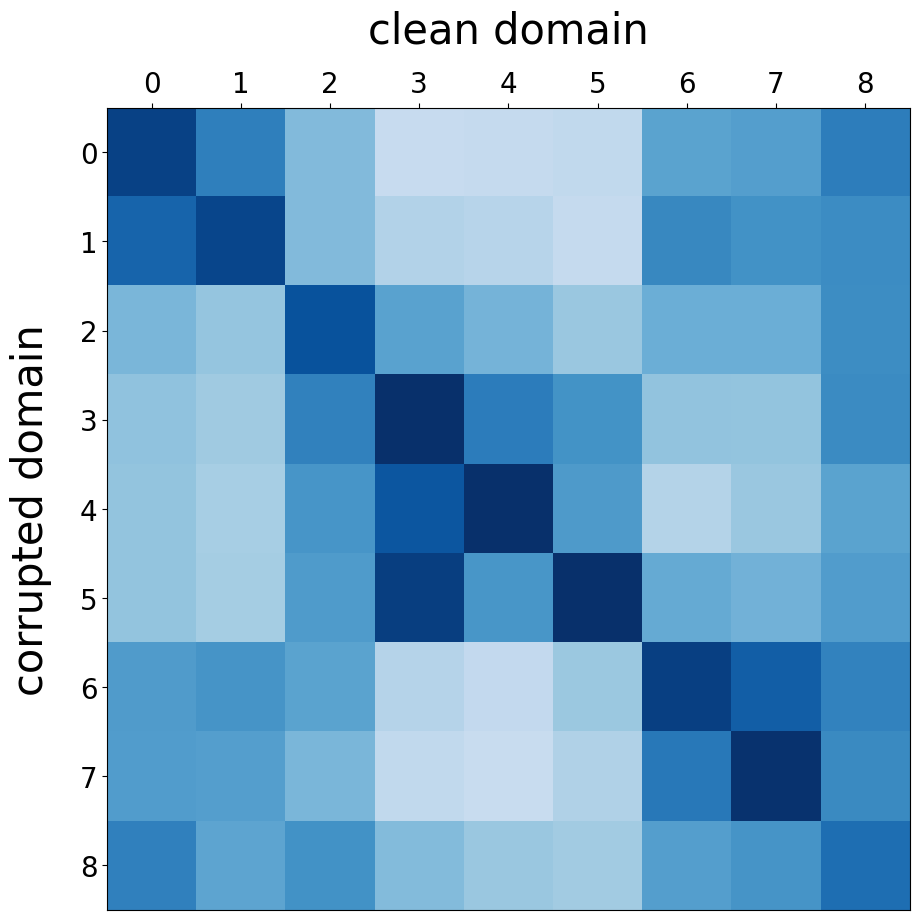

In [130]:
plot_matrix(detf_clean_corr_confusion_matrix_cs.T, dataset='cityscapes', title='OLA-DG', normalize='y', max_value=0.2, xaxis='clean domain', yaxis='corrupted domain')

In [131]:
# plot_matrix(detf_clean_corr_confusion_matrix_cs.T, dataset='cityscapes', title='OLA-DG', colorbar='on', normalize='x', max_value=0.3, xaxis='clean domain', yaxis='corrupted domain')